In [7]:
# Import the libraries 
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict
from queue import PriorityQueue

In [9]:
# Read data from CSV file
df = pd.read_csv("Distance Data.csv", sep =";")

#Convert comma objects to float
def obj_to_float(object):
    if object == "0":
        return int(object)
    else:
        list_obj = list(object)
        i = 0
        while i < len(object):
            if object[i] == ",":
                list_obj[i] = "."
                object = float("".join(list_obj))
                break
            i += 1 
        return object
for row in range(0,63):
    df.loc[row] = df.loc[row].apply(obj_to_float)

In [10]:
df.head(10)

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0,1160.328125,1116.327582,124.340009,30.55865,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0,126.38586,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.96915,25.156596,21.1382,105.505
2,Hai Phong,1116.327582,126.38586,0,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.14268,954.6847,385.354979,131.855404,20.8,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0,154.836491,706.31833,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.06003,1260.217144,10.0333,105.7833
4,Dong Nai,30.55865,1144.991818,1098.305041,154.836491,0,572.923473,1144.164266,1115.131849,870.755857,...,1078.756363,1107.678552,282.901262,1327.577244,588.20148,169.248401,1274.383073,1168.99858,10.9277,106.8681
5,Quang Nam,597.455091,656.690777,575.045991,706.31833,572.923473,0,636.558314,601.364525,418.718159,...,582.011355,604.903988,783.239711,894.008171,24.107828,409.374779,858.319831,676.81211,15.8777,108.3327
6,Bac Ninh,1160.851404,59.499238,74.855725,1240.919573,1144.164266,636.558314,0,38.05668,282.368835,...,68.89235,37.605862,1265.709719,314.368045,613.169504,1005.653147,314.828769,58.161909,21.1861,106.0763
7,Hai Duong,1132.378709,88.532125,38.212372,1214.553251,1115.131849,601.364525,38.05668,0,260.821728,...,58.062429,34.034401,1242.59758,350.219441,578.123905,974.505486,347.423565,93.797789,20.9399,106.3309
8,Nghe An,885.694721,274.868404,257.613414,961.075782,870.755857,418.718159,282.368835,260.821728,0,...,213.844712,244.772335,983.347399,480.001397,394.764678,741.845677,440.462669,299.321783,18.6733,105.6922
9,Hue,642.206796,564.393366,492.055952,741.509381,620.696956,102.61602,548.920839,515.265967,317.697656,...,490.82882,515.560339,802.268996,795.379163,79.588454,467.064339,758.012115,585.580009,16.4637,107.5908


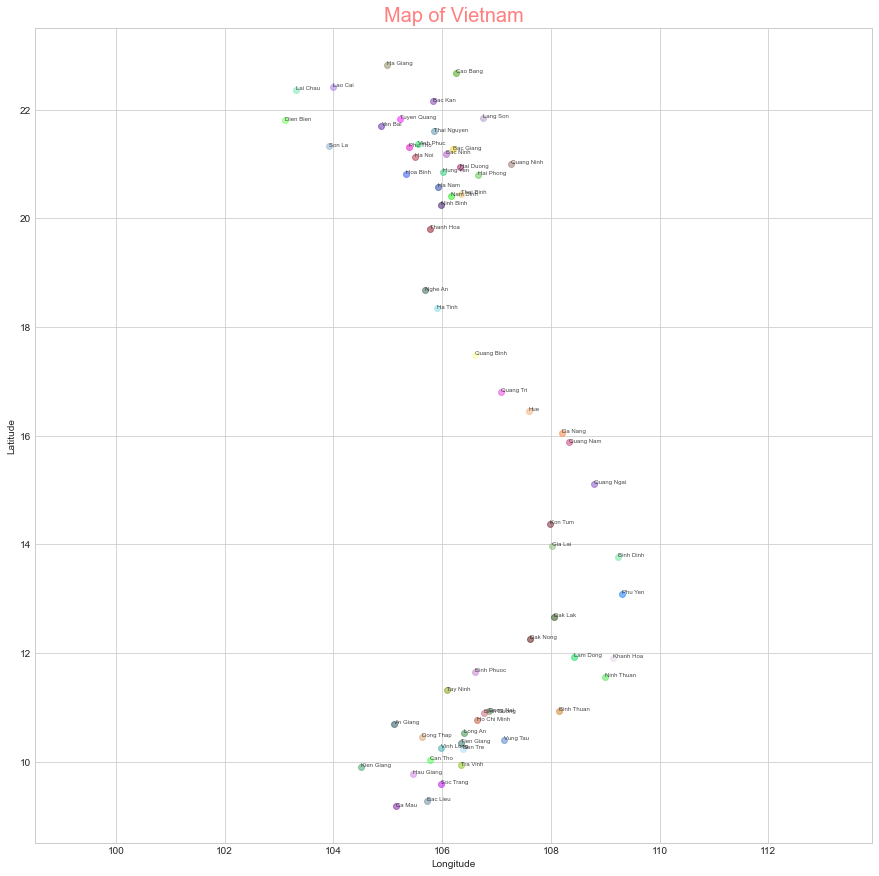

In [11]:
# Visualize
Longitude, Latitude, Province = df["Longitude"],df["Latitude"],df["Province"]

# change style plt
plt.style.available
plt.style.use('seaborn-whitegrid')

# size fig
plt.figure(figsize = (15,15))

# scatter
# plt.scatter(Longitude,Latitude, c = color, alpha = 0.4)

for x, y in zip(Longitude, Latitude):
    rgb = np.random.rand(3,)
    plt.scatter(x, y, c=[rgb], alpha = 0.5)

plt.axis([100,112,8,30])
plt.axis("equal")

# label
plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 0.5)
plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

for i in range(len(Province)):
    plt.text(Longitude[i],Latitude[i],Province[i],color = "black", fontsize = 6,alpha = 0.7)
# show
plt.show();

In [12]:
# Create START & END
start = str(input("START: ")).strip().title()
end = str(input("END: ")).strip().title()

# Time Clock 
start_time = time.time()

# Create id for START & END 
for i in range(len(df)):
    if df.iloc[i,0] == start:
        start_id = i
    elif df.iloc[i,0] == end:
        end_id = i

print("{} has ID {}.".format(start,start_id))
print("{} has ID {}.".format(end,end_id))

START: Ha Noi
END: Ho Chi Minh
Ha Noi has ID 1.
Ho Chi Minh has ID 0.


In [13]:
data = defaultdict(list) #create data
over = []

# scan each city to finding neighbor city
for i in range (df.shape[0]): 
    # add data for each index (each iter)
    lst = []

    # add neighbor city if 0 < distance < n (researching..)
    for j in range(1,df.shape[0]+1):
        if 0 < df.iloc[i,j] < 150: 
            # add name of each neighbor city
            lst.append(df.iloc[j-1,0])
            # add h(x)
            # lst.append(df.iloc[i,j])
    
    # add h(x) from current city to end city (end of list)
    lst.append(df.iloc[i,end_id+1])
    # add lst to each index of data
    data[df.iloc[i][0]] = lst

print(data["Ho Chi Minh"]) #include neighbor city with limit distance & end = h(x) from Hanoi to end_city
print(data["Ha Noi"])

['Can Tho', 'Dong Nai', 'Vung Tau', 'Soc Trang', 'Binh Duong', 'Dong Thap', 'Long An', 'Tra Vinh', 'Tay Ninh', 'Tien Giang', 'Vinh Long', 'Ben Tre', 'Binh Phuoc', 0]
['Hai Phong ', 'Bac Ninh', 'Hai Duong', 'Nam Dinh', 'Thai Nguyen', 'Phu Tho', 'Thai Binh', 'Ninh Binh', 'Hoa Binh', 'Yen Bai', 'Bac Giang', 'Tuyen Quang', 'Bac Kan', 'Ha Nam', 'Hung Yen', 'Vinh Phuc', 1160.328125]


In [14]:
# check data with range(3)
for i in range(3):
    print(df.iloc[i,0],end = ':') # name of city
    print(data[df.iloc[i,0]])     # neighbor of its
    print()                       # space line

Ho Chi Minh:['Can Tho', 'Dong Nai', 'Vung Tau', 'Soc Trang', 'Binh Duong', 'Dong Thap', 'Long An', 'Tra Vinh', 'Tay Ninh', 'Tien Giang', 'Vinh Long', 'Ben Tre', 'Binh Phuoc', 0]

Ha Noi:['Hai Phong ', 'Bac Ninh', 'Hai Duong', 'Nam Dinh', 'Thai Nguyen', 'Phu Tho', 'Thai Binh', 'Ninh Binh', 'Hoa Binh', 'Yen Bai', 'Bac Giang', 'Tuyen Quang', 'Bac Kan', 'Ha Nam', 'Hung Yen', 'Vinh Phuc', 1160.328125]

Hai Phong :['Ha Noi', 'Bac Ninh', 'Hai Duong', 'Thanh Hoa', 'Nam Dinh', 'Thai Nguyen', 'Phu Tho', 'Thai Binh', 'Quang Ninh', 'Lang Son', 'Ninh Binh', 'Hoa Binh', 'Bac Giang', 'Ha Nam', 'Hung Yen', 'Vinh Phuc', 1116.327582]



In [15]:
# Best-first Search
class Node():
    def __init__(self, name, par = None, h = 0):
        self.name = name
        self.par = par
        self.h = h
    def display(self):
        print(self.name, self.h)
    def __lt__(self, other):
        if other == None:
            return False
        return self.h < other.h
    def __eq__(self, other):
        if other == None:
            return False
        return self.name == other.name

In [66]:
def goalTest(node, G):
    if node.name == G.name:
        return True
    return False
def checkInPQ(curr, c):
    if curr == None:
        return False
    return curr in c.queue

In [71]:
def bfs(S = Node(start), G = Node(end)):
    Open = PriorityQueue()
    Closed = PriorityQueue()
    S.h = data[S.name][-1]
    Open.put(S)
    path = []
    while True:
        if Open.empty():
            return "Failure"
        
        O = Open.get()
        Closed.put(O)
        path.append(O.name)
        print("Expand: ", O.name , " "*(12-len(O.name)) , O.h)

        if goalTest(O, G):
            return "Success, path: ", path

        i = 0
        while i < len(data[O.name]) - 1:
            name = data[O.name][i]
            h = data[name][-1]
            
            curr = Node(name = name, h = h)
            curr.par = O
            
            if not checkInPQ(curr, Open) and not checkInPQ(curr, Closed):
                Open.put(curr)
            i+=1   
            

In [72]:
print("         City          Heuristic")
bfs()

         City          Heuristic
Expand:  Ha Noi        1160.328125
Expand:  Ninh Binh     1058.005018
Expand:  Thanh Hoa     1010.212451
Expand:  Nghe An       885.6947213
Expand:  Ha Tinh       846.7715457
Expand:  Quang Binh    747.4236408
Expand:  Quang Tri     673.7591033
Expand:  Da Nang       612.139008
Expand:  Quang Ngai    537.6457572
Expand:  Kon Tum       428.1045371
Expand:  Gia Lai       386.6332662
Expand:  Dak Lak       261.265604
Expand:  Dak Nong      197.3768841
Expand:  Binh Phuoc    98.73104057
Expand:  Ho Chi Minh   0


('Success, path: ',
 ['Ha Noi',
  'Ninh Binh',
  'Thanh Hoa',
  'Nghe An',
  'Ha Tinh',
  'Quang Binh',
  'Quang Tri',
  'Da Nang',
  'Quang Ngai',
  'Kon Tum',
  'Gia Lai',
  'Dak Lak',
  'Dak Nong',
  'Binh Phuoc',
  'Ho Chi Minh'])